In [ ]:
import os
from dotenv import load_dotenv
from langchain_community.llms.tongyi import Tongyi
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain_community.llms.anthropic import Anthropic

load_dotenv()

llm = Tongyi(
    model="qwen-flash",
    api_key=os.getenv("Qwen_API_Key"),
    temperature=0.5,
)
chat = ChatTongyi(
    model="qwen-flash",
    api_key=os.getenv("Qwen_API_Key"),
    temperature=0.5,
)

print('成功初始化chat模型:', chat)
print('成功初始化llm模型:', llm)

成功初始化chat模型: client=<class 'dashscope.aigc.generation.Generation'> model_name='qwen-flash' model_kwargs={} dashscope_api_key=SecretStr('**********')
成功初始化llm模型: Tongyi
Params: {'model_name': 'qwen-flash'}


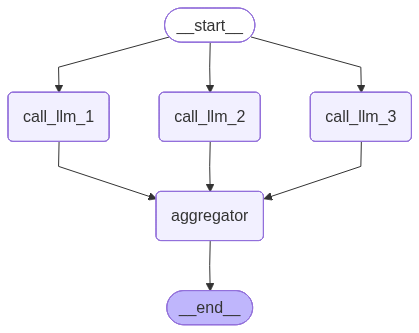

结果 1: 从**角度 1**（即基础定义和本质）回答：  
**什么是人工智能？**

人工智能（Artificial Intelligence，简称 AI）是指由人创造的能够模拟人类智能行为的系统或机器。它具备感知、学习、推理、决策、解决问题等能力，通常通过算法和数据来实现。人工智能的核心目标是使计算机或机器能够执行需要人类智慧的任务，如语音识别、图像识别、自然语言处理、自动驾驶、游戏策略等。

人工智能可以分为两大类：

1. **弱人工智能（Narrow AI）**：专注于特定任务，如人脸识别、语音助手、推荐系统等。目前大多数应用都属于这一类。
2. **强人工智能（General AI）**：具备与人类相当的通用智能，能自主学习和解决各种问题。目前尚未实现。

人工智能依赖于大数据、机器学习、深度学习等技术，通过不断训练模型，使其在特定领域内表现越来越接近甚至超越人类水平。

结果 2: 从**角度2**（可能指“技术实现角度”或“系统构成角度”）来看，人工智能（Artificial Intelligence, AI）是指通过计算机系统模拟人类智能行为的技术和方法，其核心在于使机器具备感知、学习、推理、决策和解决问题的能力。

具体来说：

1. **技术基础**：  
   人工智能依赖于算法、数据和计算能力。它通过数学模型（如神经网络、决策树、支持向量机等）对数据进行处理，从中提取规律并做出预测或决策。

2. **主要技术分支**：  
   - **机器学习**：通过数据训练模型，使系统能够自动改进性能，例如监督学习、无监督学习和强化学习。  
   - **深度学习**：基于多层神经网络的机器学习方法，擅长处理图像、语音和自然语言等复杂数据。  
   - **自然语言处理（NLP）**：让计算机理解、生成人类语言，如聊天机器人、翻译系统。  
   - **计算机视觉**：使机器“看懂”图像或视频，如人脸识别、物体检测。  
   - **专家系统**：基于规则的系统，模拟人类专家的知识和经验解决特定问题。

3. **系统构成**：  
   人工智能系统通常包括数据采集、数据预处理、模型训练、推理与决策、结果输出等模块。例如，自动驾驶汽车需要传感器（数据采集）、图像识别（计算机视觉）、路径规划（决策算法）等多个部分协同工作。

4. **目

In [4]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from operator import add
# from langgraph.types import StateGraph
from typing_extensions import TypedDict

# 定义图状态
class State(TypedDict):
    prompt: str
    result_1: str
    result_2: str
    result_3: str
    final_result: str

# 节点
def call_llm_1(state: State):
    """调用第一个 LLM"""
    result = llm.invoke(f"从角度 1 回答: {state['prompt']}")
    return {"result_1": result}

def call_llm_2(state: State):
    """调用第二个 LLM"""
    result = llm.invoke(f"从角度 2 回答: {state['prompt']}")
    return {"result_2": result}

def call_llm_3(state: State):
    """调用第三个 LLM"""
    result = llm.invoke(f"从角度 3 回答: {state['prompt']}")
    return {"result_3": result}

def aggregator(state: State):
    """聚合三个 LLM 的结果"""
    return {
        "final_result": f"结果 1: {state['result_1']}\n\n结果 2: {state['result_2']}\n\n结果 3: {state['result_3']}"
    }

# 构建工作流
workflow_builder = StateGraph(State)

# 添加节点
workflow_builder.add_node("call_llm_1", call_llm_1)
workflow_builder.add_node("call_llm_2", call_llm_2)
workflow_builder.add_node("call_llm_3", call_llm_3)
workflow_builder.add_node("aggregator", aggregator)

# 添加边来连接节点
workflow_builder.add_edge(START, "call_llm_1")
workflow_builder.add_edge(START, "call_llm_2")
workflow_builder.add_edge(START, "call_llm_3")
workflow_builder.add_edge("call_llm_1", "aggregator")
workflow_builder.add_edge("call_llm_2", "aggregator")
workflow_builder.add_edge("call_llm_3", "aggregator")
workflow_builder.add_edge("aggregator", END)

# 编译工作流
workflow = workflow_builder.compile()

# 显示工作流
from IPython.display import display, Image
display(Image(workflow.get_graph().draw_mermaid_png()))

# 调用
state = workflow.invoke({"prompt": "什么是人工智能？"})
print(state["final_result"])